# Buoy SST

* Analysis initially started in Optimal_Analysis/Homework_4
* HW4 also has a spectral analysis that shows the tidal cycle changing the water temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
year = '2023'
station = '44005'

In [3]:
#---Read in my own data (Georges Bank buoy)
df = pd.read_csv("Buoy_SST/"+station+"h"+year+".txt", delim_whitespace=True, header=0)
df = df.iloc[1: , :]
df_date = pd.to_datetime(df['#YY'].astype(str) + ' ' + df['MM'].astype(str) + ' ' + df['DD'].astype(str)
                      + ' ' + df['hh'].astype(str) + ' ' + df['mm'].astype(str), format='%Y %m %d %H %M')

df['datetime'] = df_date

df = df.sort_values(by='datetime')

/tmp/ipykernel_23465/2814638365.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Buoy_SST/"+station+"h"+year+".txt", delim_whitespace=True, header=0)


In [4]:
df

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,datetime
1,2022,12,31,23,50,200,8.0,9.7,0.99,4.76,4.00,200,1010.9,10.4,8.6,10.4,99.0,99.00,2022-12-31 23:50:00
2,2023,01,01,00,50,195,5.1,5.8,0.97,4.55,4.22,195,1010.3,9.9,8.6,9.9,99.0,99.00,2023-01-01 00:50:00
3,2023,01,01,01,50,184,5.1,6.1,0.95,9.09,4.18,146,1008.6,9.9,8.6,9.9,99.0,99.00,2023-01-01 01:50:00
4,2023,01,01,02,50,193,6.8,8.1,0.96,10.00,4.49,143,1007.5,10.1,8.6,10.1,99.0,99.00,2023-01-01 02:50:00
5,2023,01,01,03,50,195,7.0,8.3,0.93,9.09,4.32,152,1006.4,9.7,8.7,9.7,99.0,99.00,2023-01-01 03:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35316,2023,12,31,23,10,296,5.6,8.4,0.82,10.81,5.02,155,1013.5,2.1,6.5,999.0,99.0,99.0,2023-12-31 23:10:00
35317,2023,12,31,23,20,301,3.2,5.3,99.0,99.0,99.0,999,1013.7,1.9,6.5,999.0,99.0,99.0,2023-12-31 23:20:00
35318,2023,12,31,23,30,290,3.0,4.8,99.0,99.0,99.0,999,1013.7,2.0,6.5,999.0,99.0,99.0,2023-12-31 23:30:00
35319,2023,12,31,23,40,295,3.5,6.3,0.86,11.43,5.35,153,1013.7,2.0,6.5,999.0,99.0,99.0,2023-12-31 23:40:00


In [5]:
wtmp_raw = np.asarray(df['WTMP'], dtype=float)

In [6]:
print("occurances of missing data:", np.count_nonzero(wtmp_raw == 999))

occurances of missing data: 55


In [7]:
#--- Replacing missing values (999)
wtmp_clean = wtmp_raw

#--- Find indices where number needs replacing
error_indices = np.where(wtmp_raw == 999)[0]

#--- Replace each missing value with the previous value
for i in range(len(wtmp_raw)):
  if wtmp_raw[i] == 999:
    wtmp_clean[i] = wtmp_raw[i-1]

In [8]:
print("occurances of missing data:", np.count_nonzero(wtmp_clean == 999))

occurances of missing data: 0


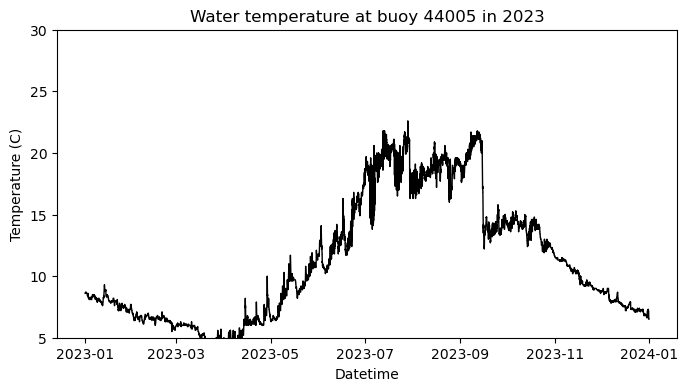

In [9]:
fig, ax = plt.subplots(1, figsize=(8,4))

ax.set_xlabel('Datetime')
ax.set_ylabel('Temperature (C)')
ax.set_title('Water temperature at buoy '+station+' in '+year)
ax.set_ylim(5, 30)

#--- Zoom in on a certain date
#ax.set_xlim(datetime(2023, 9, 12), datetime(2023, 9, 24))

ax.plot(df.datetime, wtmp_clean, color='#000', linewidth=1)

#plt.savefig('wtmp_'+station+'.png', dpi = 300)
plt.show()